In [181]:
import pandas as pd
import numpy as np
#from google.colab import files
import io
import statsmodels.api as sm
from numpy import linalg as LA
from sklearn.metrics import r2_score

In [182]:
df_train = pd.read_csv("/Users/shawheennaderi/Downloads/train.data.csv")
df_test = pd.read_csv("/Users/shawheennaderi/Downloads/test.data.csv") 
BG = pd.read_csv("/Users/shawheennaderi/Downloads/fancyhouse.csv")  

In [183]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [184]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
4,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [185]:
X_name = ['bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot']
X_train = df_train.loc[:,X_name]
X_train = sm.add_constant(X_train)
y_train = df_train.loc[:,'price']

X_test = df_test.loc[:,X_name]
X_test = sm.add_constant(X_test)
y_test = df_test.loc[:,'price']

In [186]:
### linear regression on variable bedrooms + bathrooms + sqft_living + sqft_lot on train set
lm1 = sm.OLS(y_train,X_train)
results = lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     3937.
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        16:32:44   Log-Likelihood:            -2.0994e+05
No. Observations:               15129   AIC:                         4.199e+05
Df Residuals:                   15124   BIC:                         4.199e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.083e+04   8208.136      9.848      0.000    6.47e+04    9.69e+04
bedrooms     -5.93e+04   2753.246    -21.537      0.000   -6.47e+04   -5.39e+04
bathrooms    3681.6562   4178.213      0.881      0.378   -4508.146    1.19e+04
sqft_living   316.6857      3.750     84.442      0.000     309.335     324.037
sqft_lot       -0.4267      0.055     -7.753      0.000      -0.535      -0.319
==============================================================================
Omnibus:                    10367.299   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           367476.372
Skew:                           2.827   Prob(JB):                         0.00
Kurtosis:                      26.473   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:

# Predict on the test set
y_pred_test = results.predict(X_test)

# Compute R² on test set
test_r2 = r2_score(y_test, y_pred_test)

# Print both
print(f"Training R²: {results.rsquared:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Training R²: 0.5101
Testing R²: 0.5050


### Part B

In [188]:
BG = BG.loc[:,X_name]
BG_price = 8.083e+04+8*(-5.93e+04 )+25*3681.6562+50000*316.6857+225000*(-0.4267)
print("price = ", BG_price)
print(BG)


price =  15436748.905
   bedrooms  bathrooms  sqft_living  sqft_lot
0         8         25        50000    225000


The price being only around 15 million seems to be an underestimate, I think Bill Gates house value is actually over $100 million

In [189]:

print(np.mean(X_train))

3354.318140657016


### Part C

In [190]:
# Step 1: Copy the original
X_train_new = X_train.copy()
X_test_new = X_test.copy()

# Step 2: Add the interaction feature
X_train_new['bed_bath'] = X_train_new['bedrooms'] * X_train_new['bathrooms']
X_test_new['bed_bath'] = X_test_new['bedrooms'] * X_test_new['bathrooms']


In [191]:
X_test_new

,const,bedrooms,bathrooms,sqft_living,sqft_lot,bed_bath
0,1.0,3,1.00,1180,5650,3.00
1,1.0,2,1.00,770,10000,2.00
2,1.0,3,2.50,3560,9796,7.50
3,1.0,4,1.00,1600,4300,4.00
4,1.0,3,1.00,1250,9774,3.00
...,...,...,...,...,...,...
6479,1.0,2,2.25,1530,981,4.50
6480,1.0,5,3.75,4470,8088,18.75
6481,1.0,3,2.00,1490,1126,6.00
6482,1.0,4,2.50,2520,6023,10.00


In [192]:
lm2 = sm.OLS(y_train, X_train_new)
results2 = lm2.fit()
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     3242.
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        16:32:44   Log-Likelihood:            -2.0982e+05
No. Observations:               15129   AIC:                         4.197e+05
Df Residuals:                   15123   BIC:                         4.197e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.208e+05   1.79e+04     17.927      

In [193]:


# Predict on the test set
y_pred_test_new = results2.predict(X_test_new)

# Compute R² on test set
test_r2_new = r2_score(y_test, y_pred_test_new)

# Print both
print(f"Training R²: {results2.rsquared:.4f}")
print(f"Testing R²: {test_r2_new:.4f}")


Training R²: 0.5174
Testing R²: 0.5105


### Part D

We needed to change the code from discussion some because it was the version of numpy that was being used is outdated so the code had to be adjusted 

In [194]:
def GD(X, y, iters):
    n = y.shape[0]
    epsilon = 1e-4

    # Initialize theta as a column vector
    theta = np.random.normal(size=(X.shape[1], 1))

    # Compute Hessian and optimal learning rate eta
    H = 2 * X.T @ X
    w, _ = LA.eig(H)
    lambda_max = np.max(w)
    lambda_min = np.min(w)
    eta = 2 / (lambda_max + lambda_min)

    # Initialize loss list
    l2loss = [np.linalg.norm(y - X @ theta)]

    # Gradient descent loop
    for i in range(1, iters + 1):
        gradient = X.T @ (X @ theta - y)
        theta = theta - eta * gradient

        loss = np.linalg.norm(y - X @ theta)
        l2loss.append(loss)

        

        if np.linalg.norm(gradient) < epsilon:
            print(f"Converged at iteration {i}, Loss: {loss:.6f}")
            break

    return theta, l2loss


In [195]:


# Convert y_train to a normalized column vector
y_train_gd = y_train.to_numpy().reshape(-1, 1)  # shape: (n_samples, 1)
Ynorm = np.linalg.norm(y_train_gd, axis=0)
y_train_gd = y_train_gd / Ynorm

# Convert X_train to a normalized 2D array
X_train_gd = X_train.to_numpy()  # shape: (n_samples, n_features)
Xnorm = np.linalg.norm(X_train_gd, axis=0)
X_train_gd = X_train_gd / Xnorm

# Define R-squared function
def Rsq(actual, pred):
    rss = np.linalg.norm(actual - pred)**2
    tss = np.linalg.norm(actual - np.mean(actual))**2
    rsq = 1 - rss / tss
    return rsq

# Format BG input vector (feature vector for Bill Gates' house)
BG = np.array(BG).reshape(-1)   # ensure it's 1D
BG = np.append(1, BG)           # prepend intercept term
BG_normalized = BG / Xnorm      # normalize using training feature norms

# Run gradient descent on training data
theta, loss1 = GD(X_train_gd, y_train_gd, iters=10000)

# Compute training R²
train_r2 = Rsq(y_train_gd, X_train_gd @ theta)
print(f"Training R² (Gradient Descent): {train_r2:.4f}")

# Predict BG's house price
BG_price_pred = ((BG_normalized @ theta) * Ynorm).item()
print(f"Predicted Price for BG's House: ${BG_price_pred:,.2f}")


Converged at iteration 807, Loss: 0.394670
Training R² (Gradient Descent): 0.5101
Predicted Price for BG's House: $15,424,000.86


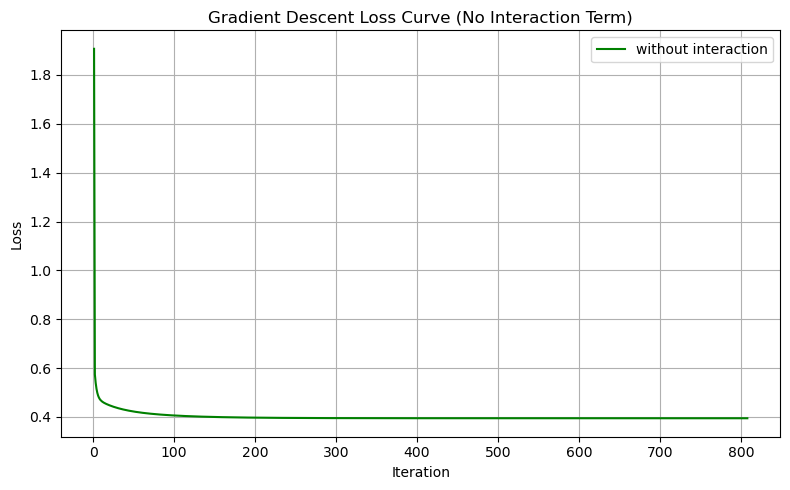

In [196]:
import matplotlib.pyplot as plt  # more common import style

# Plot loss vs. iteration
plt.figure(figsize=(8, 5))  # optional: set figure size
plt.plot(np.arange(1, len(loss1) + 1), loss1, color='g', label="without interaction")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent Loss Curve (No Interaction Term)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
#plt.savefig("loss_no_int.png")  # saves to file
plt.show()  # displays inline if using Jupyter or notebook


We implemented linear regression using gradient descent without any built-in linear modeling functions. The model converged after 852 iterations (changes every run) and achieved a training R² of 0.5101, closely matching the result from statsmodels.OLS. The predicted price for Bill Gates’ house was $15,424,035.16 (changes slighly every run ), nearly identical to the earlier estimate. This confirms our gradient descent implementation is accurate when using an appropriately chosen step size. Results were consistent with the previous model, demonstrating that gradient descent can effectively approximate the OLS solution.
